In [6]:
#impor the libraries and read the dataset
import pandas as pd
import numpy as np
import datetime
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

df = pd.read_csv("accidents.csv")



In [7]:
df.head(2)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN


In [8]:
# select on the the first five columns
df2 = df.iloc[:, 0:5]
df2

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [9]:
#drop row beyond 2020
df3 = df2[df2['JAHR']< 2021]
df3

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [11]:
#drop the null entries in the month column
df3= df3[df3['MONAT']!= 'Summe']
df3

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [12]:
#convert the date elements to timestamp
df3['JAHR']=pd.to_datetime(df3['JAHR'],format='%Y')
df3['JAHR']=pd.DatetimeIndex(df3['JAHR']).year
df3['MONAT']=pd.to_datetime(df3['MONAT'], format='%Y%m')
#df4['MONAT']=pd.DatetimeIndex(df4['MONAT']).month
df3.tail()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
2081,Verkehrsunfälle,Verletzte und Getötete,2000,2000-08-01,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,2000-09-01,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,2000-10-01,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,2000-11-01,578.0
2085,Verkehrsunfälle,Verletzte und Getötete,2000,2000-12-01,515.0


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 26 to 2085
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MONATSZAHL   1764 non-null   object        
 1   AUSPRAEGUNG  1764 non-null   object        
 2   JAHR         1764 non-null   int64         
 3   MONAT        1764 non-null   datetime64[ns]
 4   WERT         1764 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 82.7+ KB


Text(0.5, -0.2, 'Fig.Number of Accidents By Category')

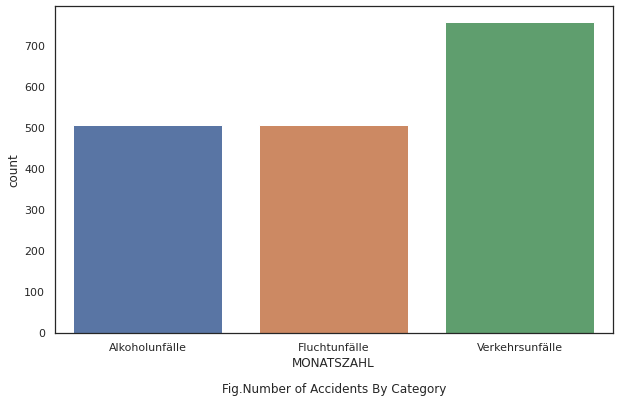

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (10,6))
sns.set(style="white", color_codes=True)
sns.countplot(data=df3,
              x='MONATSZAHL')
plt.title("Fig.Number of Accidents By Category", y=-.2)

Text(0.5, -0.2, 'Fig.Number of Accidents of Category: Alkoholunfälle')

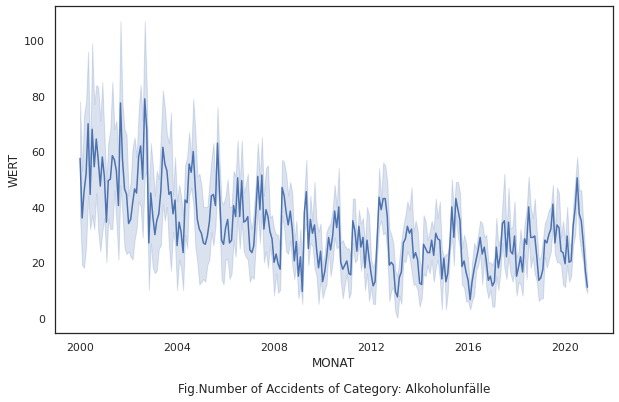

In [39]:
plt.figure(figsize= (10,6))
accident_grouped = df3.query("MONATSZAHL == 'Alkoholunfälle'")
sns.lineplot(data=accident_grouped, x="MONAT", y="WERT")
plt.title("Fig.Number of Accidents of Category: Alkoholunfälle", y=-.2)

Text(0.5, -0.2, 'Fig.Number of Accidents of Category: Fluchtunfälle')

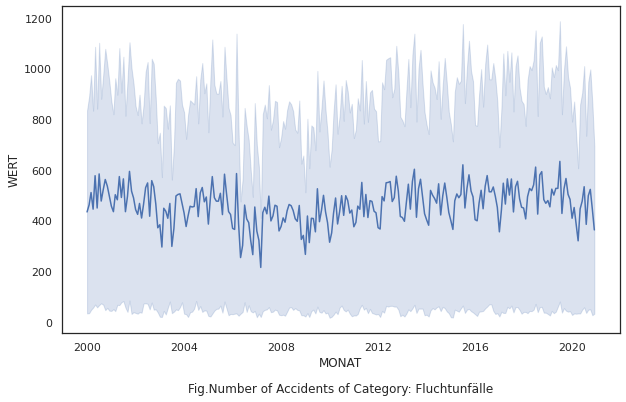

In [38]:
plt.figure(figsize= (10,6))
accident_grouped = df3.query("MONATSZAHL == 'Fluchtunfälle'")
sns.lineplot(data=accident_grouped, x="MONAT", y="WERT")
plt.title("Fig.Number of Accidents of Category: Fluchtunfälle", y=-.2)

Text(0.5, -0.2, 'Fig.Number of Accidents of Category: Verkehrsunfälle')

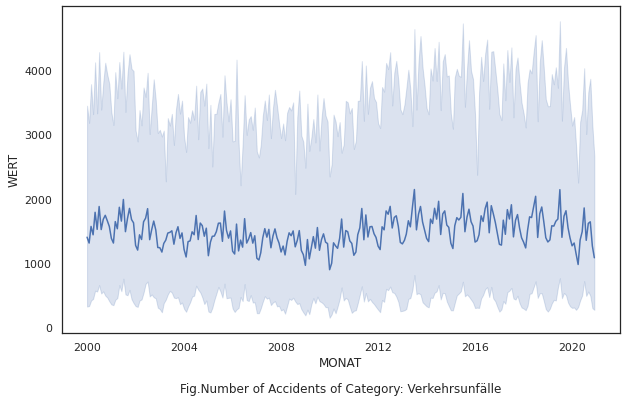

In [37]:
plt.figure(figsize= (10,6))
accident_grouped = df3.query("MONATSZAHL == 'Verkehrsunfälle'")
sns.lineplot(data=accident_grouped, x="MONAT", y="WERT")
plt.title("Fig.Number of Accidents of Category: Verkehrsunfälle", y=-.2)

Text(0.5, -0.2, 'Fig.Number of Accidents By Category')

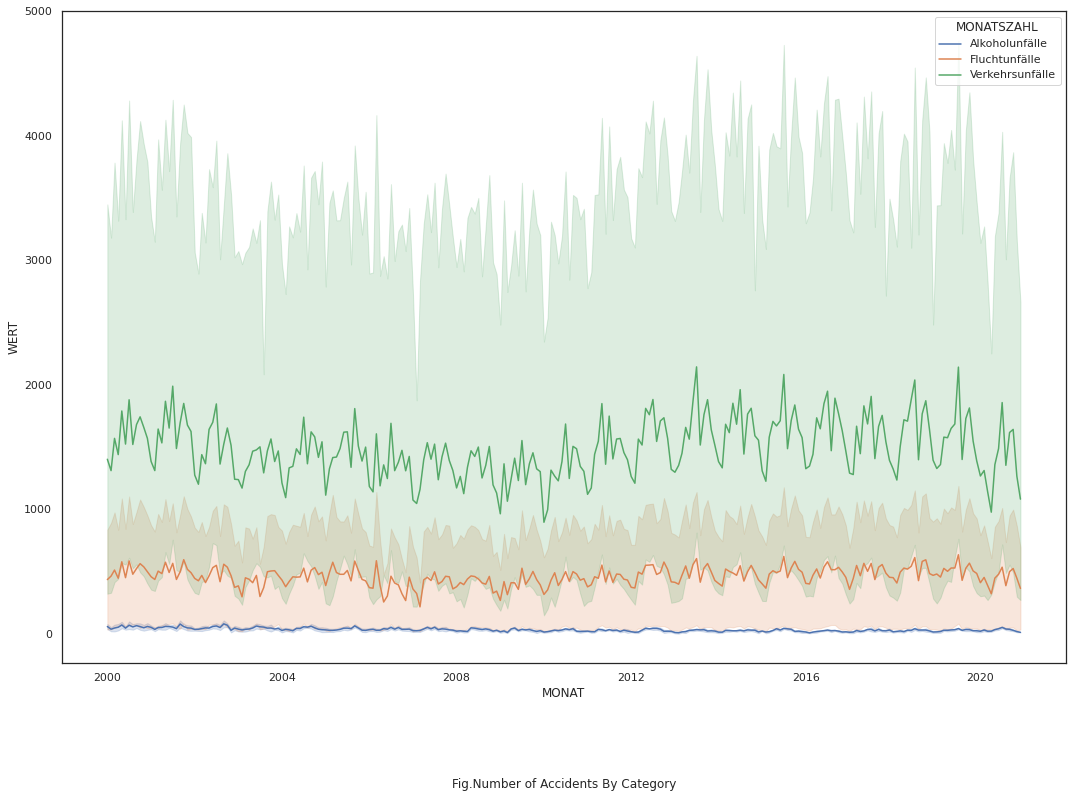

In [33]:
plt.figure(figsize= (18,12))
sns.lineplot(data=df3, 
             x="MONAT",
             y="WERT",
             hue= 'MONATSZAHL')
plt.title("Fig.Number of Accidents By Category", y=-.2)

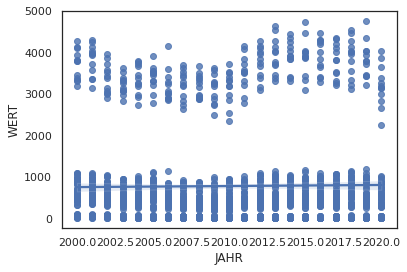

In [31]:
sns.regplot(data=df3, 
             x="JAHR",
             y="WERT")

In [ ]:
#export cleaned dataset to csv
df3.to_csv('accidents_cleaned1.csv', encoding = 'utf-8-sig') 